### Music Genre WebScrapping
Using the everynoyse.com website, which displays the genres associate with the searched Artist/Band, it is possible to obtain this data using webscrapping techniques and adding to the dataset, which is done like demonstrated.

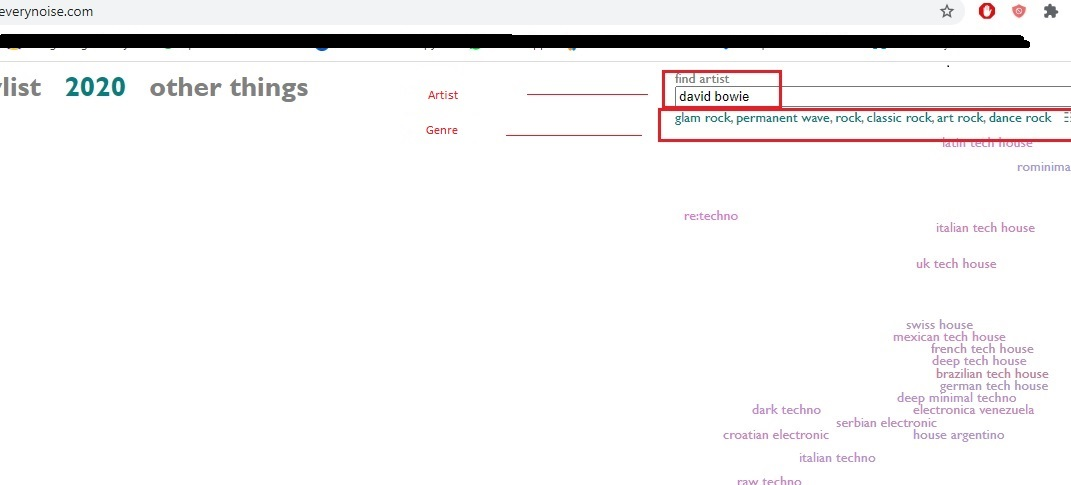

In [5]:
from IPython.display import Image
Image(filename='webscrapping_everynoise.jpg') 

Retrieving the artists array from the millionsong Dataset

In [ ]:
# Get Csv File
import numpy as np
import pandas as pd

song_df = pd.read_csv(r'C:\Users\Nathan\Documents\music recommendation system\song_df.csv')

In [ ]:
artists = song_df['artist_name'].unique()
artists = artists.tolist()
artists = pd.Series(artists)

## 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
all_genres = []
PATH =  r'C:\Users\Nathan\Documents\webscrapping\chromedriver.exe'

for artist in range(0,len(artists)):
    
    #Getting the url from the website to webscrap
    driver = webdriver.Chrome(PATH)
    driver.maximize_window()
    driver.get("http://everynoise.com/")
    
    # getting the searchbar for artists at the website
    iframe = driver.find_element_by_tag_name('iframe')
    driver.switch_to.frame(iframe)
    search = driver.find_element_by_name("who")

    # inputing the artist name from our dataset in the searchbar
    search.send_keys(artists[artist])
    search.send_keys(Keys.RETURN)
    time.sleep(1)

    # getting the genres for the artist
    genres = driver.find_elements_by_tag_name("a")
    genres = genres[0:-2]

    artist_genres = ''

    for j in range(0,len(genres)):
        artist_genres = artist_genres + genres[j].text + ','

    artist_genres = artist_genres[0:-1]
    all_genres.append(artist_genres)

    driver.quit()

    

In [ ]:
all_genres.to_excel(r'C:\Users\Nathan\Documents\music recommendation system\allgenres.xlsx',header=None)